In [1]:
# Initial imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import datetime as dt
from path import Path
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.tree import DecisionTreeRegressor

In [2]:
# Loading data

file_path = Path("../Decision Tree Model/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv")
df_bitcoin = pd.read_csv(file_path)
df_bitcoin.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Drop NaNs from the Dataset.

df_bitcoin.dropna(inplace=True)

# show the first 5 rows

df_bitcoin.head(5)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
478,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
547,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
548,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
1224,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000


In [7]:
# Define features set

X = df_bitcoin.drop(["Weighted_Price"], axis = 1)

# X = X.drop(["Open", "High", "Low", "Close", "Volume_(BTC)", "Volume_(Currency)"], axis=1)

X.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency)
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000
478,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000
547,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338
548,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000
1224,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160


In [8]:
# Convert Timestamp into TimeZone (ET)

df_bitcoin['Timestamp'] = (pd.to_datetime(df_bitcoin['Timestamp'], unit='s'))
# show the first 5 rows

df_bitcoin.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
478,2011-12-31 15:50:00,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
547,2011-12-31 16:59:00,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
548,2011-12-31 17:00:00,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
1224,2012-01-01 04:16:00,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000


In [9]:
# Check to see is the "Timestamp was moved to the First Column"
df_bitcoin.index = df_bitcoin.Timestamp
df_bitcoin.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,,
2011-12-31 07:52:00,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
2011-12-31 15:50:00,2011-12-31 15:50:00,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
2011-12-31 16:59:00,2011-12-31 16:59:00,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
2011-12-31 17:00:00,2011-12-31 17:00:00,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
2012-01-01 04:16:00,2012-01-01 04:16:00,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000


In [10]:
# Check to see what type of data you have
df_bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3613769 entries, 2011-12-31 07:52:00 to 2021-03-31 00:00:00
Data columns (total 8 columns):
 #   Column             Dtype         
---  ------             -----         
 0   Timestamp          datetime64[ns]
 1   Open               float64       
 2   High               float64       
 3   Low                float64       
 4   Close              float64       
 5   Volume_(BTC)       float64       
 6   Volume_(Currency)  float64       
 7   Weighted_Price     float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 248.1 MB


In [12]:
# Define target vector
y = df_bitcoin["Weighted_Price"].values.reshape(-1, 1)
y[:5]

array([[4.39     ],
       [4.39     ],
       [4.5264115],
       [4.58     ],
       [4.58     ]])

In [13]:
# Get data by the minute instead of by the second

df_bitcoin = df_bitcoin.resample('D').mean()

In [14]:
# Check to see if the data was grabbed for each day over each second
df_bitcoin.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31,4.465000,4.482500,4.465000,4.482500,23.829470,106.330084,4.471603
2012-01-01,4.806667,4.806667,4.806667,4.806667,7.200667,35.259720,4.806667
2012-01-02,5.000000,5.000000,5.000000,5.000000,19.048000,95.240000,5.000000
2012-01-03,5.252500,5.252500,5.252500,5.252500,11.004660,58.100651,5.252500
2012-01-04,5.200000,5.223333,5.200000,5.223333,11.914807,63.119577,5.208159


In [15]:
# Splitting into Train and Test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [22]:
# Creating the descion tree regression

regressor = DecisionTreeRegressor()

In [23]:
# Fitting the model

regressor.fit(X, y)

DecisionTreeRegressor()

In [24]:
# Making predictions using the testing data

y_pred = regressor.predict(X)
y_pred

array([4.39000000e+00, 4.39000000e+00, 4.52641150e+00, ...,
       5.86961985e+04, 5.87618662e+04, 5.87643494e+04])

In [25]:
print(len(y_pred))

3613769


In [26]:
y_pred.shape

(3613769,)

<function matplotlib.pyplot.show(close=None, block=None)>

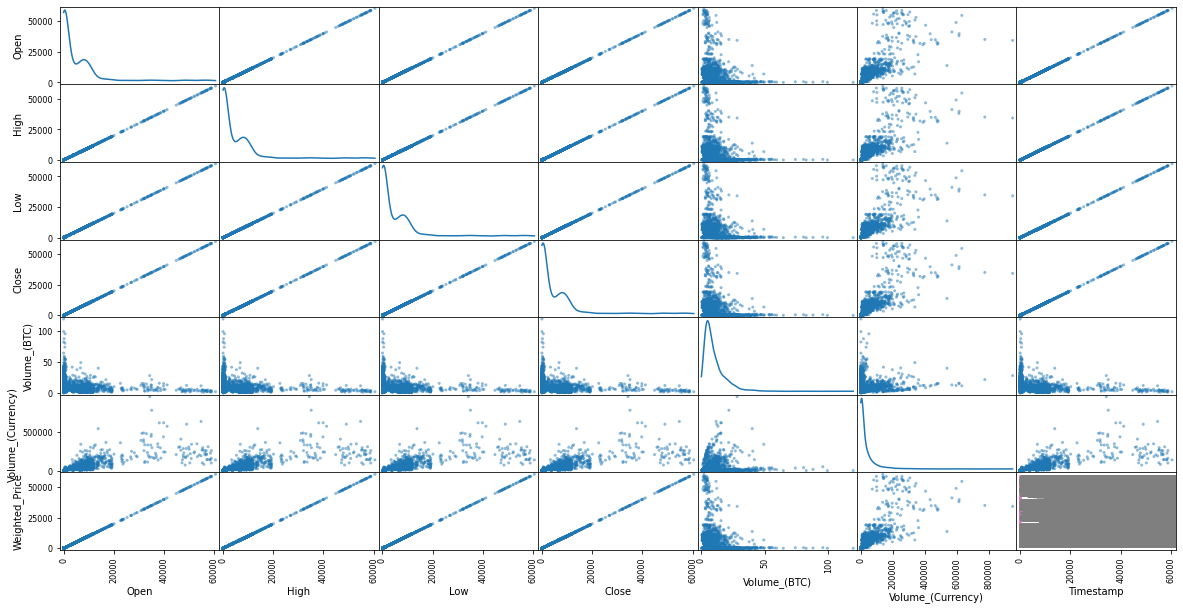

In [33]:
# Visualizing the Decision Tree Regression Results

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]
pd.plotting.scatter_matrix(df_bitcoin, diagonal = 'kde')
plt.plot(X, regressor.predict(X))
plt.title("")
plt.xlabel("Timestamp")
plt.ylabel("Close")
plt.show

In [34]:
# Accuracy score can't be calculated using this model so we decided not to go forward with this model.